# Project 1: Defining a Problem and Data Understanding
### Fabiola Rojas

## Introduction 

### The Problem
What is the problem you are trying to solve? What questions are you trying to find answers to?  

- What factors (or combinations of factors) have the most significant impact on delivery times?
- Does the age of the delivery person have any correlation to delivery time? Can we assume older delivery personnel have more experience and perform better than younger counterparts? Or are younger drivers able to perform more efficiently?
- How extreme do external factors (weather, traffic) need to be to have an impact on delivery times?
- Are customers understanding about these external factors? At what point does the customer become dissatisfied? Does their satisfaction depend on the content of the order as well as the speed of delivery?

### The Data
Where did you find it. What is the data about (include links)? What are the features (with additional explanations if not already self-explanatory from the name itself)?  

The [Food Delivery Time](https://www.kaggle.com/datasets/gautamdeora7/food-delivery-time-a-multi-factor-dataset?resource=download) dataset was created by kaggle users, sourcing data through kaggle and various weather and traffic APIs, with the goal to accurately predict food delivery times. Here are the features as described on kaggle:  

- **ID:** A unique identifier for each delivery instance, used to distinguish individual records.

- **Delivery_person_ID:** A unique identifier assigned to each delivery person for tracking purposes.

- **delivery_person_age:** Age of the delivery person, potentially influencing delivery efficiency.

- **Delivery_person_Ratings:** Customer ratings for the delivery person, reflecting performance and service quality.

- **Restaurant_latitude:** Geographical latitude coordinate of the restaurant's location.

- **Restaurant_longitude:** Geographical longitude coordinate of the restaurant's location.

- **Delivery_location_latitude:** Latitude coordinate of the delivery location where the order is delivered.

- **Delivery_location_longitude:** Longitude coordinate of the delivery location for the order.

- **Type_of_order:** Category of food ordered (e.g., meal, snacks ,drinks,buffet) to analyze preparation times.

- **Type_of_vehicle:** The vehicle used for delivery (e.g., scooter , motor cycyle , cycle ,ev scooter), which affects speed and travel time.

- **Temperature:** Ambient temperature during the delivery time, potentially impacting delivery efficiency.

- **Humidity:** Level of atmospheric moisture during delivery, affecting conditions for travel.

- **Precipitation:** Amount of rainfall or snow, indicating weather disruptions during delivery.

- **Weather_description:** Textual description of the weather (e.g., sunny, cloudy, stormy) for context in travel conditions.

- **Traffic_Level:** Severity of traffic congestion during the delivery (e.g., low, medium, high).

- **Distance (km):** The calculated distance between the restaurant and the delivery location in kilometers.

- **target:** The target variable representing the delivery time in minutes for model predictions.

In [1]:
import pandas as pd
delivery_df = pd.read_csv("/Users/fabiolarojas/Documents/itcs3162/Food_Time_Data_Set.csv")

In [2]:
delivery_df.shape

(10001, 18)

In [3]:
delivery_df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'temperature', 'humidity', 'precipitation', 'weather_description',
       'Unnamed: 14', 'Traffic_Level', 'Distance (km)', 'TARGET'],
      dtype='object')

In [4]:
delivery_df.columns = delivery_df.columns.str.lower()

In [5]:
delivery_df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,unnamed: 14,traffic_level,distance (km),target
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,NaN,High,18.92,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,NaN,Low,2.64,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,NaN,Very High,28.80,51.06666667
9999,3FB2,MUMRES11DEL03,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,NaN,High,17.63,43.8


<span style="color: green;">column "Unnamed: 14" is all nulls, as well as the last row, remove these</span>  


In [6]:
delivery_df = delivery_df.drop(columns='unnamed: 14')
delivery_df = delivery_df.iloc[:-1]
delivery_df.shape

(10000, 17)

In [7]:
delivery_df.dtypes

id                              object
delivery_person_id              object
delivery_person_age            float64
delivery_person_ratings        float64
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
type_of_order                   object
type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
traffic_level                   object
distance (km)                  float64
target                          object
dtype: object

In [8]:
delivery_df.isna().sum()

id                               0
delivery_person_id               0
delivery_person_age              0
delivery_person_ratings          0
restaurant_latitude              0
restaurant_longitude             0
delivery_location_latitude       0
delivery_location_longitude      0
type_of_order                    0
type_of_vehicle                  0
temperature                      5
humidity                         5
precipitation                    5
weather_description              5
traffic_level                  915
distance (km)                  920
target                         541
dtype: int64

<span style="color: green;">541 nulls for target. target is the most important column for investigating the impact of external factors, so let's look at this column. the dtype should be float, but it's actually object. it's possible there are some strings hidden in there.</span>

In [9]:
print(delivery_df['target'].apply(type).unique())


[<class 'str'> <class 'float'>]


<span style="color: green;">now we know this column contains floats as expected, as well as nulls and strings. let's make sure the column only contains numeric characters.</span>

In [10]:
delivery_df[delivery_df['target'].str.match(r'^[A-Za-z]+$', na=False)]


,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,traffic_level,distance (km),target


In [11]:
delivery_df['target'].dropna().apply(type).value_counts()


target
<class 'str'>    9459
Name: count, dtype: int64

<span style="color: green;">all the target rows contain numeric strings, aside from the 541 nulls. we'll keep the nulls for now but convert the strings to floats.</span>

In [12]:
delivery_df['target'] = pd.to_numeric(delivery_df['target'], errors='coerce')
delivery_df.dtypes

id                              object
delivery_person_id              object
delivery_person_age            float64
delivery_person_ratings        float64
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
type_of_order                   object
type_of_vehicle                 object
temperature                    float64
humidity                       float64
precipitation                  float64
weather_description             object
traffic_level                   object
distance (km)                  float64
target                         float64
dtype: object

<span style="color: green;">only 5 nulls for temperature, humidity, precipitation, and weather_description. let's see if they're all in the same rows</span>

In [13]:
delivery_df[delivery_df['temperature'].isna()]

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,traffic_level,distance (km),target
5000,60C2,HYDRES01DEL03,26.0,4.9,17.410371,78.437225,17.440371,78.467225,Drinks,scooter,NaN,NaN,NaN,NaN,Moderate,8.51,NaN
6000,2ECE,SURRES11DEL01,24.0,4.5,21.157735,72.768778,21.267735,72.878778,Drinks,motorcycle,NaN,NaN,NaN,NaN,High,22.71,NaN
7000,3D19,SURRES13DEL01,34.0,3.6,21.170096,72.789122,21.240096,72.859122,Drinks,electric_scooter,NaN,NaN,NaN,NaN,High,13.50,NaN
8000,61EA,SURRES02DEL02,25.0,4.8,21.186608,72.794136,21.266608,72.874136,Drinks,scooter,NaN,NaN,NaN,NaN,High,17.99,NaN
9000,5.00E+33,CHENRES17DEL01,28.0,4.8,13.045479,80.233110,13.085479,80.273110,Buffet,scooter,NaN,NaN,NaN,NaN,Low,8.55,NaN


## Data Understanding/Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
delivery_df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,traffic_level,distance (km),target
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,Low,NaN,21.666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.266667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.583333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.183333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.450000


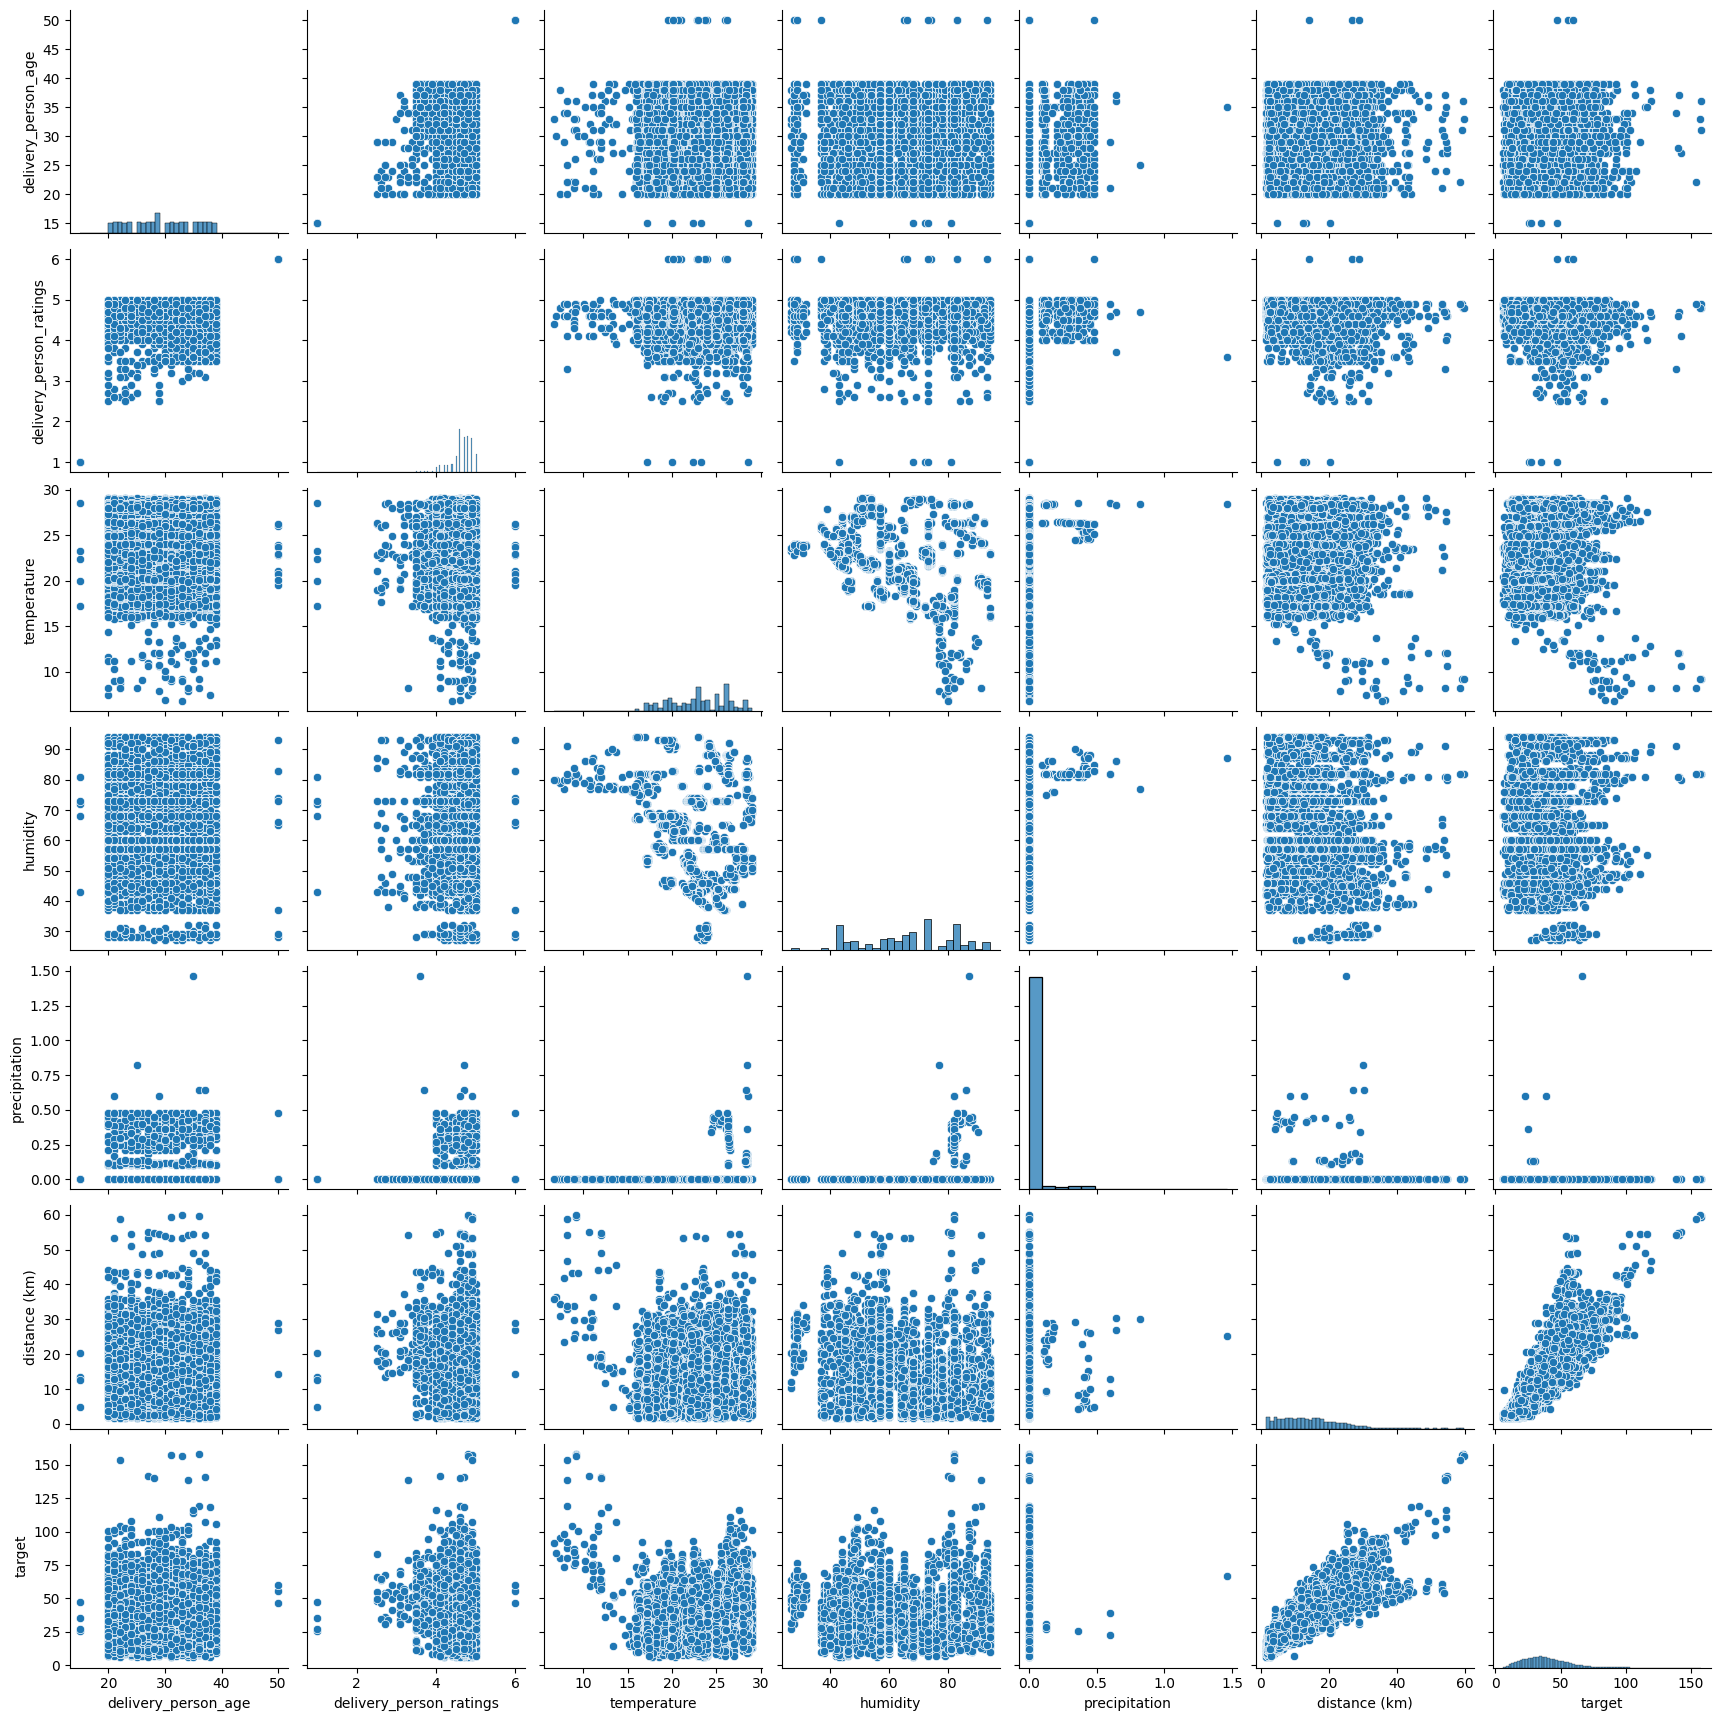

In [16]:
pairplot = sns.pairplot(data=delivery_df, vars=['delivery_person_age', 'delivery_person_ratings', 
                                                'temperature', 'humidity', 'precipitation', 
                                                'distance (km)', 'target'])


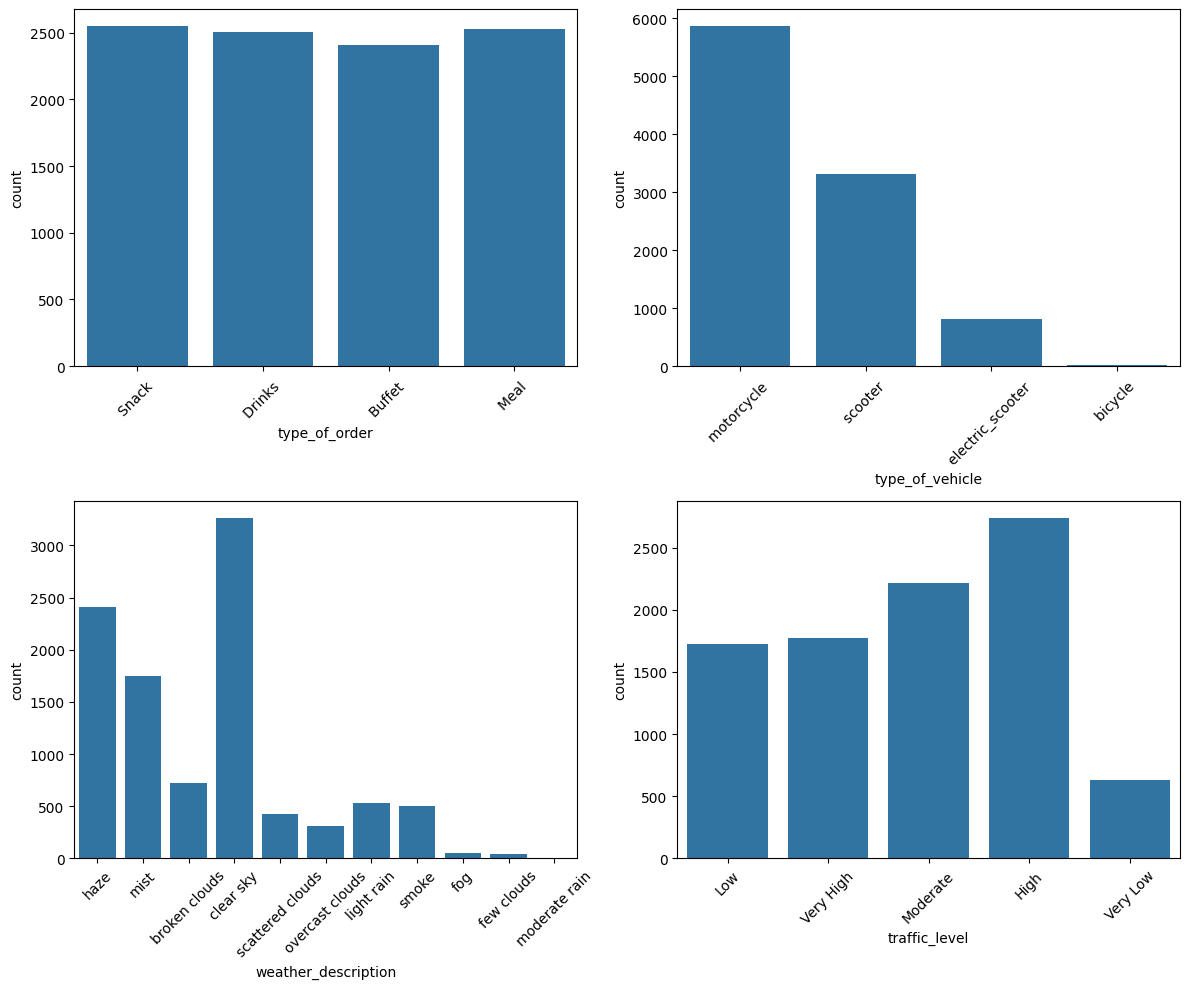

In [17]:
categorical = ['type_of_order', 'type_of_vehicle', 'weather_description', 'traffic_level']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(data=delivery_df, x=col, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


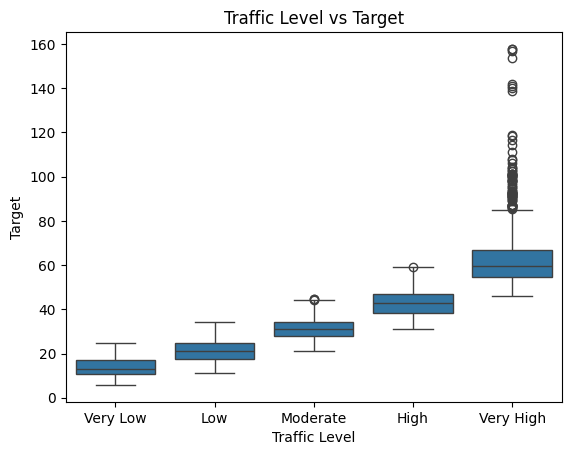

In [18]:
order = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

sns.boxplot(data=delivery_df, x='traffic_level', y='target', order=order)

plt.title('Traffic Level vs Target')
plt.xlabel('Traffic Level')
plt.ylabel('Target')

plt.show()


<span style="color: green;">as traffic increases, delivery time increases</span>

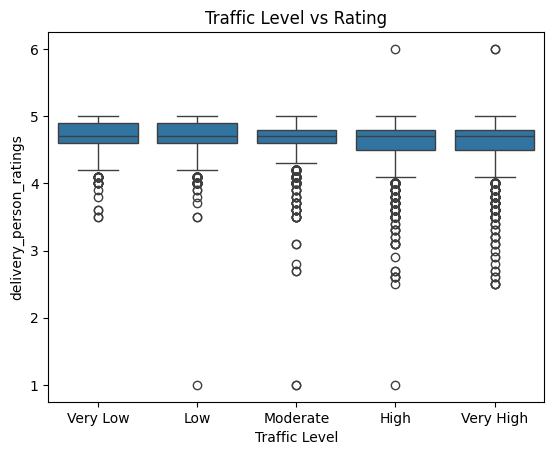

In [19]:
sns.boxplot(data=delivery_df, x='traffic_level', y='delivery_person_ratings', order=order)

plt.title('Traffic Level vs Rating')
plt.xlabel('Traffic Level')
plt.ylabel('delivery_person_ratings')

plt.show()


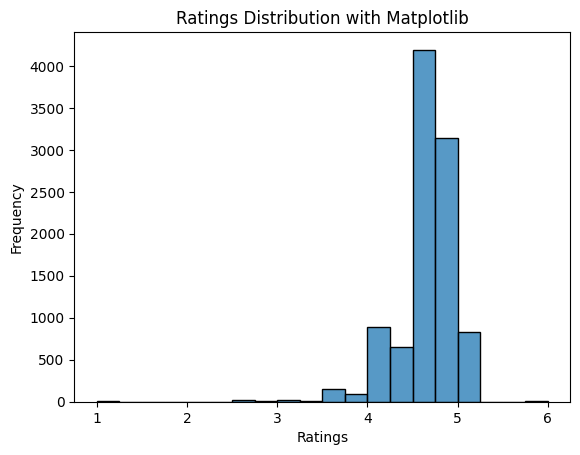

In [20]:
sns.histplot(data=delivery_df, x='delivery_person_ratings', bins=20)

plt.title('Ratings Distribution with Matplotlib')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.show()


In [21]:
delivery_df[delivery_df['delivery_person_ratings']>5]

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,type_of_order,type_of_vehicle,temperature,humidity,precipitation,weather_description,traffic_level,distance (km),target
3586,46D,BANGRES05DEL01,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,Meal,electric_scooter,19.55,93.0,0.00,mist,NaN,NaN,NaN
4714,493,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,Snack,bicycle,21.05,65.0,0.00,broken clouds,NaN,NaN,NaN
5169,4F2,JAPRES08DEL01,50.0,6.0,-26.910262,-75.783013,27.020262,75.893013,Drinks,scooter,23.90,28.0,0.00,clear sky,NaN,NaN,NaN
5362,430,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,Meal,electric_scooter,22.86,74.0,0.00,haze,Very High,27.03,55.800000
5651,BEF 1.00,AGRRES13DEL02,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,Drinks,scooter,25.96,37.0,0.00,clear sky,NaN,NaN,NaN
6394,427,JAPRES06DEL02,50.0,6.0,26.911927,75.797282,27.041927,75.927282,Meal,electric_scooter,23.71,29.0,0.00,clear sky,Very High,28.81,59.683333
7031,3EB,MYSRES15DEL02,50.0,6.0,-12.352058,-76.606650,12.372058,76.626650,Buffet,scooter,20.70,66.0,0.00,clear sky,NaN,NaN,NaN
7681,D42,VADRES09DEL01,50.0,6.0,0.000000,0.000000,0.010000,0.010000,Meal,bicycle,26.22,83.0,0.48,light rain,NaN,NaN,NaN
9499,3F0,BANGRES010DEL01,50.0,6.0,12.933298,77.614293,13.003298,77.684293,Drinks,scooter,22.89,73.0,0.00,haze,High,14.22,46.866667
9535,3EF,RANCHIRES13DEL01,50.0,6.0,-23.374989,-85.335486,23.444989,85.405486,Snack,bicycle,20.12,83.0,0.00,mist,NaN,NaN,NaN


weird

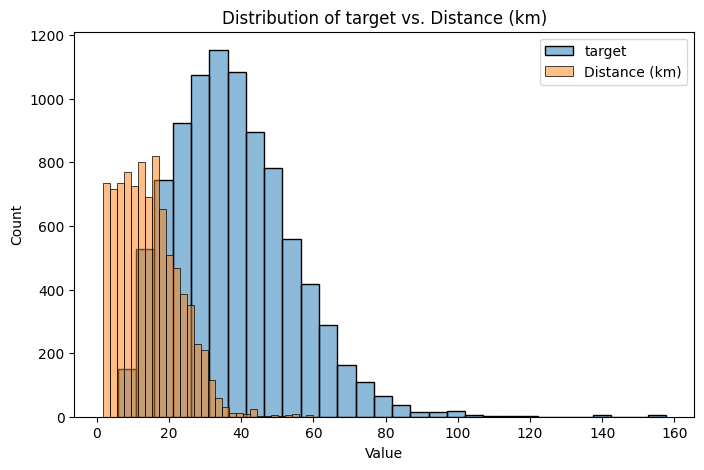

In [22]:
plt.figure(figsize=(8, 5))

sns.histplot(delivery_df["target"], label="target", bins=30, alpha=0.5)
sns.histplot(delivery_df["distance (km)"], label="Distance (km)", bins=30, alpha=0.5)

plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Distribution of target vs. Distance (km)")
plt.legend()
plt.show()


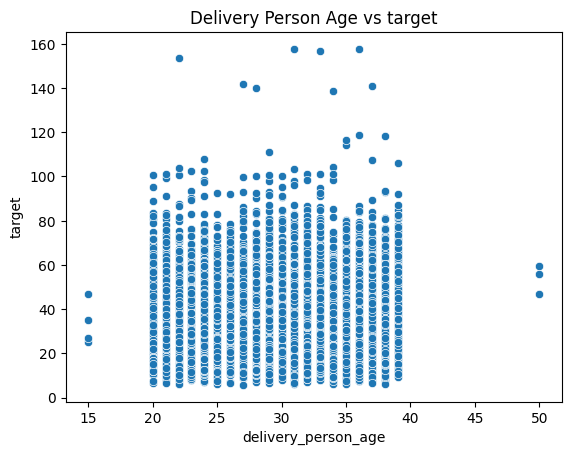

In [23]:
sns.scatterplot(data=delivery_df, x="delivery_person_age", y="target")
plt.title("Delivery Person Age vs target")
plt.show()

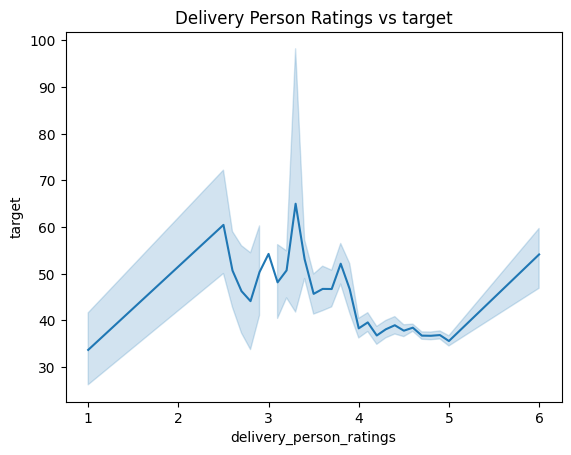

In [24]:
sns.lineplot(data=delivery_df, x="delivery_person_ratings", y="target")
plt.title("Delivery Person Ratings vs target")
plt.show()
